In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'gray'

In [2]:
from IPython.display import Image

In [3]:
dictionary = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_6X6_250)

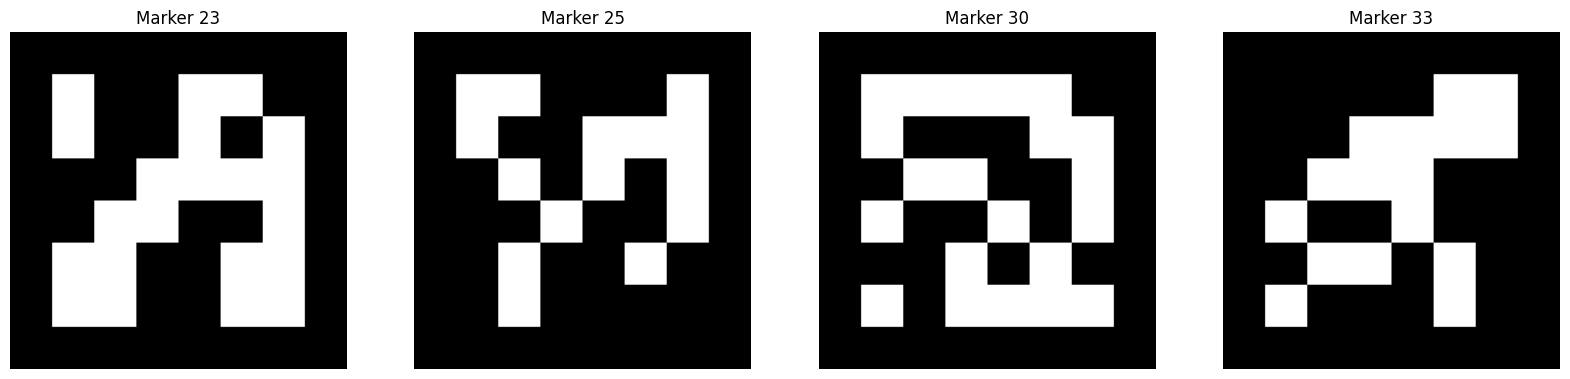

True

In [6]:
#img = cv2.aruco.generateImageMarker(dictionary,id,sidePixel)
marker_image1 = cv2.aruco.generateImageMarker(dictionary, 23, 200)
marker_image2 = cv2.aruco.generateImageMarker(dictionary, 25, 200)
marker_image3 = cv2.aruco.generateImageMarker(dictionary, 30, 200)
marker_image4 = cv2.aruco.generateImageMarker(dictionary, 33, 200)

plt.figure(figsize=(20,10))
plt.subplot(141);plt.axis('off');plt.imshow(marker_image1);plt.title("Marker 23")
plt.subplot(142);plt.axis('off');plt.imshow(marker_image2);plt.title("Marker 25")
plt.subplot(143);plt.axis('off');plt.imshow(marker_image3);plt.title("Marker 30")
plt.subplot(144);plt.axis('off');plt.imshow(marker_image4);plt.title("Marker 33")
plt.show()

cv2.imwrite("marker_23.png",marker_image1)
cv2.imwrite("marker_25.png",marker_image2)
cv2.imwrite("marker_30.png",marker_image3)
cv2.imwrite("marker_33.png",marker_image4)

In [7]:
frame = cv2.imread('../marker_23_printed.png')

corners, ids, rejected = cv2.aruco.detectMarkers(frame, dictionary)

In [8]:
print(corners)

(array([[[134., 103.],
        [531., 104.],
        [530., 499.],
        [135., 502.]]], dtype=float32),)


In [9]:
print(ids)

[[23]]


In [11]:
len(rejected)

17

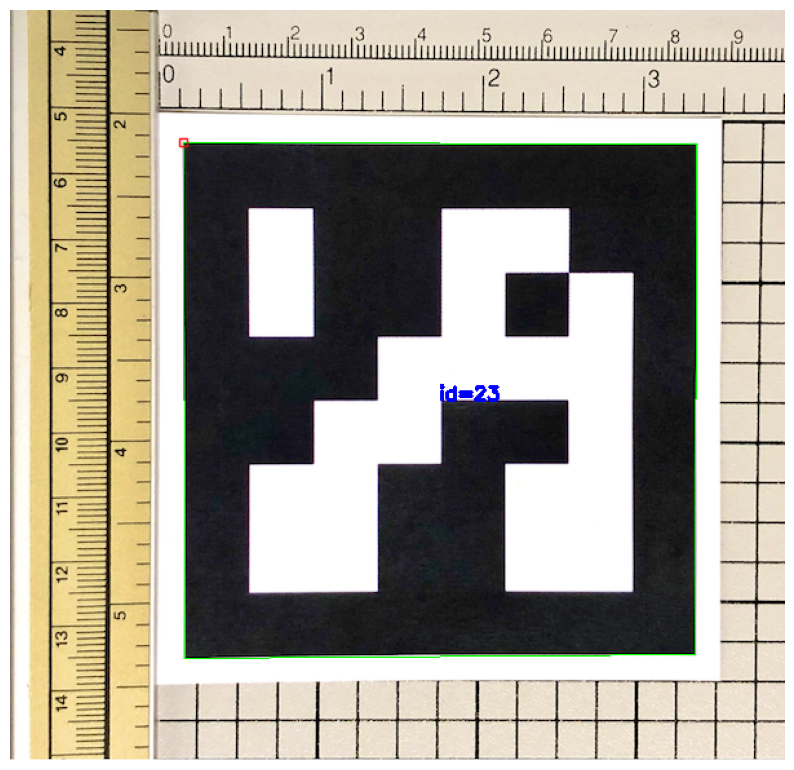

In [13]:
cv2.aruco.drawDetectedMarkers(frame, corners, ids)
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(frame[:,:,::-1])

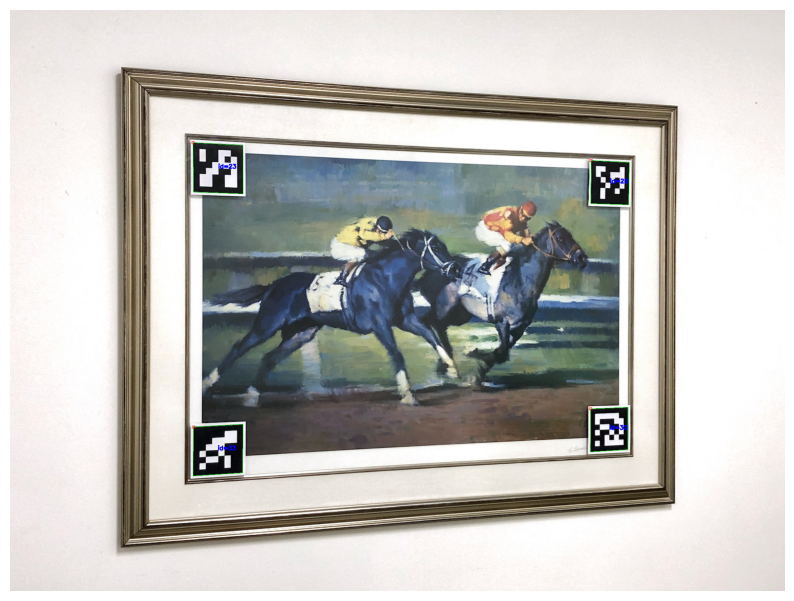

In [16]:
frame_dst = cv2.imread('../office_markers.jpg')

corners, ids, rejected = cv2.aruco.detectMarkers(frame_dst, dictionary)

frame_detected = frame_dst.copy()

cv2.aruco.drawDetectedMarkers(frame_detected, corners, ids)
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(frame_detected[:,:,::-1])
plt.show()

In [18]:
#Extract corner points of ROI
index = np.squeeze(np.where(ids == 23))
ref_pt1 = np.squeeze(corners[index[0]])[0]

index = np.squeeze(np.where(ids == 25))
ref_pt2 = np.squeeze(corners[index[0]])[1]

index = np.squeeze(np.where(ids == 30))
ref_pt3 = np.squeeze(corners[index[0]])[2]

index = np.squeeze(np.where(ids == 33))
ref_pt4 = np.squeeze(corners[index[0]])[3]

In [20]:
ref_pt3

array([1594., 1135.], dtype=float32)

In [21]:
x_distance = np.linalg.norm(ref_pt1 - ref_pt2)
y_distance = np.linalg.norm(ref_pt1 - ref_pt2)

scale_fact_x = .008 
scale_fact_y = .012

delta_x = round(scale_fact_x * x_distance)
delta_y = round(scale_fact_y * y_distance)

pts_dst = [[ref_pt1[0] - delta_x, ref_pt1[1] - delta_y]]
pts_dst = pts_dst + [[ref_pt2[0] + delta_x,ref_pt2[1] - delta_y]]
pts_dst = pts_dst + [[ref_pt3[0] + delta_x,ref_pt3[1] + delta_y]]
pts_dst = pts_dst + [[ref_pt4[0] - delta_x,ref_pt4[1] + delta_y]]


In [22]:
pts_dst

[[463.0, 330.0], [1607.0, 381.0], [1603.0, 1149.0], [463.0, 1217.0]]

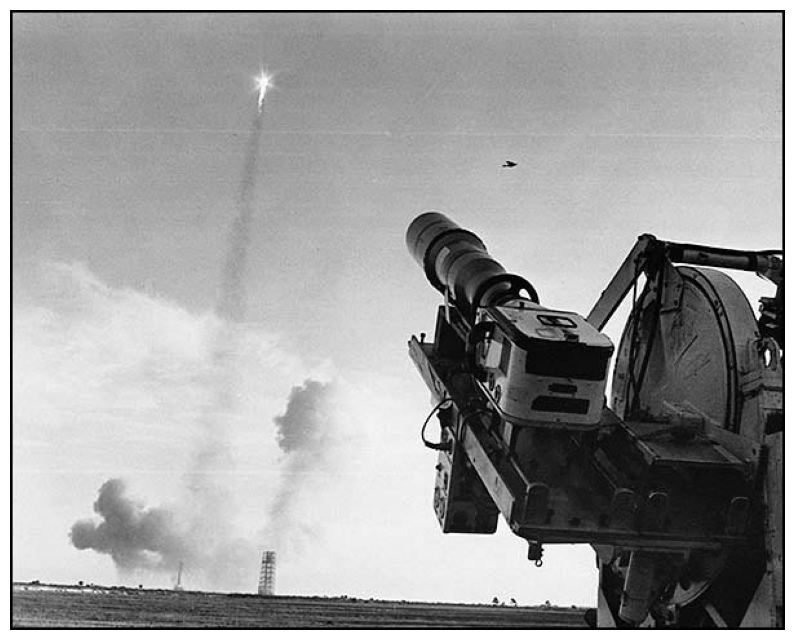

In [23]:
frame_src = cv2.imread('../Apollo-8-Launch.png')
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(frame_src[:,:,::-1])
plt.show()

In [25]:
#Getting the image corners
pts_src = [[0,0],[frame_src.shape[1],0],[frame_src.shape[1],frame_src.shape[0]],[0,frame_src.shape[0]]]

In [26]:
pts_src

[[0, 0], [600, 0], [600, 480], [0, 480]]

In [27]:
pts_src_m = np.asarray(pts_src)
pts_dst_m = np.asarray(pts_dst)

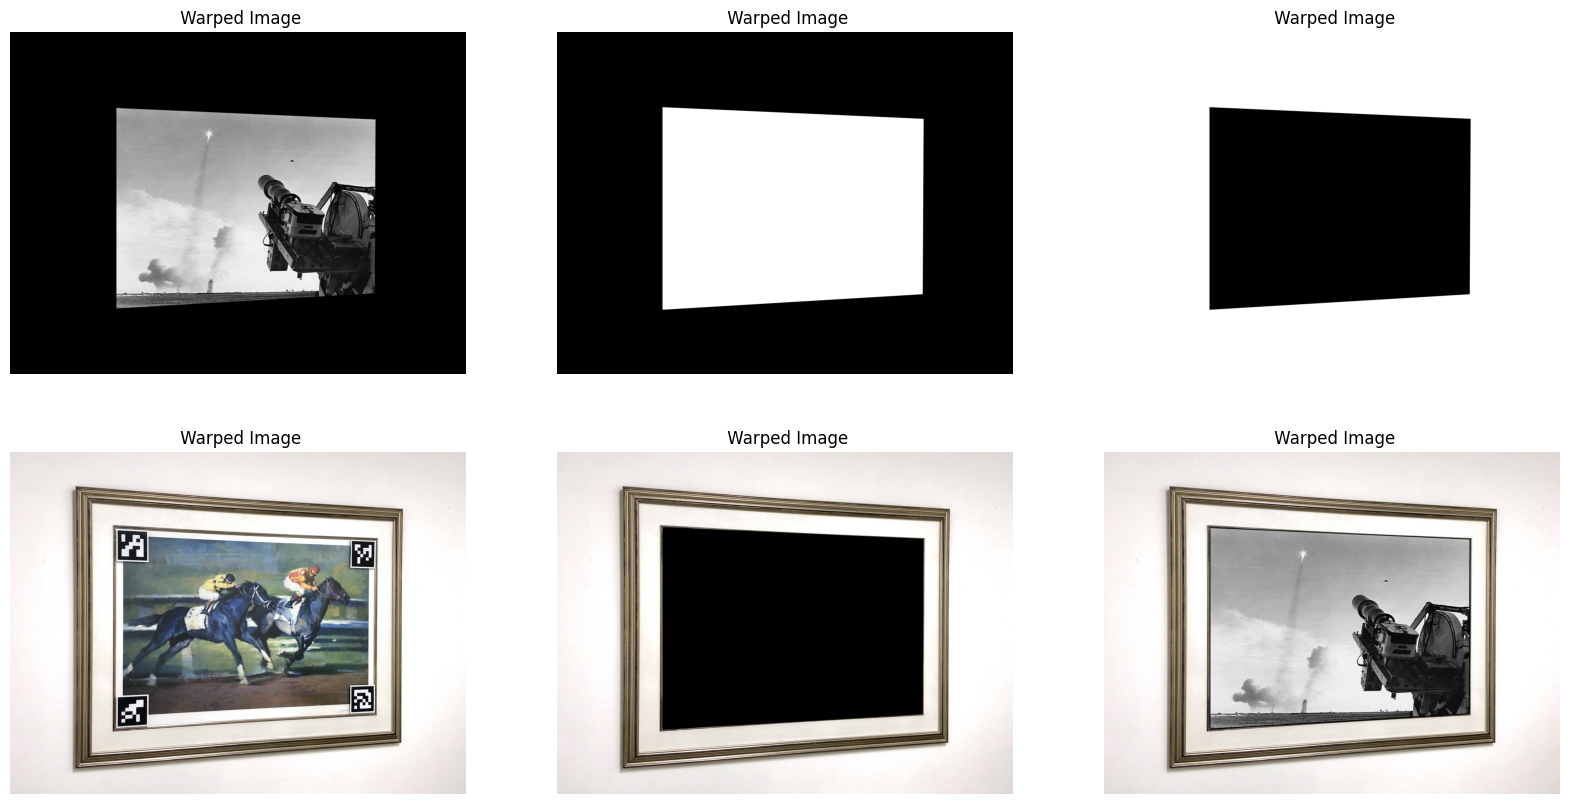

In [30]:
h, mask = cv2.findHomography(pts_src_m, pts_dst_m,cv2.RANSAC)

warped_image = cv2.warpPerspective(frame_src, h, (frame_dst.shape[1],frame_dst.shape[0]))

warped_image_copy = warped_image.copy()

mask = np.zeros([frame_dst.shape[0],frame_dst.shape[1]],dtype = np.uint8)

cv2.fillConvexPoly(mask, np.int32([pts_dst_m]),(255,255,255),cv2.LINE_AA)

warped_image = warped_image.astype(float)

mask3 = np.zeros_like(warped_image)
for i in range(0,3):
    mask3[:,:,i] = mask / 255

mask3_inv = 1 - mask3

frame_masked = cv2.multiply(frame_dst.astype(float), mask3_inv)

frame_out = cv2.add(warped_image, frame_masked)

frame_masked = np.uint8(frame_masked)

frame_out = frame_out.astype(np.uint8)

plt.figure(figsize=(20,10))
plt.subplot(231);plt.axis('off');plt.imshow(warped_image_copy);plt.title(" Warped Image")
plt.subplot(232);plt.axis('off');plt.imshow(mask);plt.title(" Mask Image")
plt.subplot(233);plt.axis('off');plt.imshow(mask3_inv);plt.title(" Mask3 Image")
plt.subplot(234);plt.axis('off');plt.imshow(frame_dst[:,:,::-1]);plt.title(" Destination Image")
plt.subplot(235);plt.axis('off');plt.imshow(frame_masked[:,:,::-1]);plt.title(" Frame Masked")
plt.subplot(236);plt.axis('off');plt.imshow(frame_out[:,:,::-1]);plt.title(" Final Result")
plt.show()